<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 2.1: Metabolomics of Gastric Cancer: Principal Component Analysis (PCA) with a loadings plot

<p style="text-align: justify">
<br>
This tutorial covers the necessary steps for producting a PCA with a loadings plot using data from a gastric cancer study.
</p>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), statsmodels (<a href="www.statsmodels.org/">statsmodels.org</a>), Scikit-learn (<a href="scikit-learn.org/">scikit-learn.org</a>), scikits.bootstrap (<a href="github.com/cgevans/scikits-bootstrap">github.com/cgevans/scikits-bootstrap</a>) and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
home = os.getcwd() + "/"

import numpy as np
import pandas as pd
import multivis

print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak Table</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> tables from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br>

This dataset has previously been published in (<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4716538/">Chan, A, et al. (2016)</a>) in <i>British Journal of Cancer</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>

Please inspect the <a href="GastricCancer_NMR.xlsx">GastricCancer_NMR.xlsx </a>Excel file before using it in this tutorial to understand its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'GastricCancer_NMR.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="GastricCancer_NMR.xlsx">GastricCancer_NMR.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'GastricCancer_NMR.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading table: Peak
Loading table: Data
TOTAL SAMPLES: 123 TOTAL PEAKS: 149
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table

Check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>

</div>

In [3]:
display(DataTable)

,Idx,SampleID,SampleType,Class,M1,M2,M3,M4,M5,M6,...,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149
1,2,sample_2,Sample,Gastric Cancer,43.0,525.7,130.2,NaN,694.5,114.5,...,84.2,357.1,16.1,455.5,29.5,28.1,35.8,316.1,390.7,199.0
2,3,sample_3,Sample,Benign Gastric Disease,214.3,10703.2,104.7,46.8,483.4,152.3,...,993.5,1698.5,32.9,75.9,33.2,802.8,967.6,154.4,31.6,195.2
3,4,sample_4,Sample,Healthy,31.6,59.7,86.4,14.0,88.6,10.3,...,58.1,83.5,60.5,136.9,17.0,10.2,24.7,64.1,91.4,91.6
4,5,sample_5,Sample,Gastric Cancer,81.9,258.7,315.1,8.7,243.2,18.4,...,44.5,47.6,45.6,1441.7,35.2,0.1,22.8,135.0,322.3,254.3
5,6,sample_6,Sample,Benign Gastric Disease,196.9,128.2,862.5,18.7,200.1,4.7,...,143.8,157.2,10.4,182.1,32.6,435.1,325.3,162.4,129.7,207.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,134,sample_134,Sample,Benign Gastric Disease,133.9,172.6,121.5,128.4,324.6,79.7,...,69.3,268.4,7.1,62.7,27.4,2.8,32.5,249.6,1868.7,325.8
120,135,sample_135,Sample,Healthy,7.5,390.5,67.9,38.4,58.9,26.5,...,99.7,184.4,1.7,94.7,32.3,NaN,5.8,174.2,NaN,145.5
121,137,sample_137,Sample,Gastric Cancer,405.3,510.7,521.9,91.9,732.1,145.7,...,434.8,84.8,182.3,110.7,123.9,0.4,36.3,60.1,317.3,401.7
122,138,sample_138,Sample,Benign Gastric Disease,45.4,191.6,41.0,18.7,40.8,32.2,...,45.3,44.5,14.5,83.8,27.9,0.3,0.5,47.3,47.8,46.5


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table

Check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

,Idx,Name,Label,Score,VIP1,Pvalue,QC_RSD
1,1,M1,1_3-Dimethylurate,0.273432,0.921751,0.899999,32.208005
2,2,M2,1_6-Anhydro-β-D-glucose,0.386187,2.071139,0.586879,31.178028
3,3,M3,1_7-Dimethylxanthine,0.122120,2.892664,0.068365,34.990605
4,4,M4,1-Methylnicotinamide,0.781881,2.360494,0.877783,12.804201
5,5,M5,2-Aminoadipate,0.412730,2.969282,0.312104,9.372664
...,...,...,...,...,...,...,...
145,145,M145,uarm1,0.226951,0.805725,0.584023,41.406985
146,146,M146,uarm2,0.370446,2.261353,0.882148,34.458172
147,147,M147,β-Alanine,0.853027,2.679534,0.679136,27.623517
148,148,M148,π-Methylhistidine,0.116367,2.554018,0.839549,16.561921


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Calculate the percentage of missing values in the data

</div>

In [5]:
stats_missing = multivis.utils.statistics(PeakTable, DataTable)

stats_missing.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [6]:
params = dict({'parametric': False
              , 'log_data': (False, 10)
              , 'scale_data': (False, 'minmax')
              , 'impute_data': (False, 3)               
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Healthy'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': True
              , 'group_missing': True
              , 'pca_loadings': False
              , 'normality_test': False
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': False})

stats_missing.set_params(**params)

PeakTablePercentMissing = stats_missing.calculate()

In [7]:
display(PeakTablePercentMissing)

,Idx,Name,Label,Score,VIP1,Pvalue,QC_RSD,Percent_Group_Benign Gastric Disease_Missing,Percent_Group_Gastric Cancer_Missing,Percent_Group_Healthy_Missing,Percent_Total_Missing
0,0,M1,1_3-Dimethylurate,0.273432,0.921751,0.899999,32.208005,10.0,11.627907,12.5,11.382114
1,1,M2,1_6-Anhydro-β-D-glucose,0.386187,2.071139,0.586879,31.178028,0.0,2.325581,0.0,0.813008
2,2,M3,1_7-Dimethylxanthine,0.122120,2.892664,0.068365,34.990605,7.5,2.325581,7.5,5.691057
3,3,M4,1-Methylnicotinamide,0.781881,2.360494,0.877783,12.804201,7.5,16.279070,5.0,9.756098
4,4,M5,2-Aminoadipate,0.412730,2.969282,0.312104,9.372664,5.0,0.000000,0.0,1.626016
...,...,...,...,...,...,...,...,...,...,...,...
144,144,M145,uarm1,0.226951,0.805725,0.584023,41.406985,10.0,13.953488,35.0,19.512195
145,145,M146,uarm2,0.370446,2.261353,0.882148,34.458172,2.5,0.000000,7.5,3.252033
146,146,M147,β-Alanine,0.853027,2.679534,0.679136,27.623517,0.0,2.325581,2.5,1.626016
147,147,M148,π-Methylhistidine,0.116367,2.554018,0.839549,16.561921,0.0,0.000000,5.0,1.626016


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Data cleaning with QC_RSD (QC relative standard deviation) and the total percentage missing values

</div>

In [8]:
# Remove any features with >=25% QC_RSD and >=10% missing values
PeakTableClean = PeakTablePercentMissing.query('QC_RSD < 25 & Percent_Total_Missing < 10')
peaklist = PeakTableClean['Name'] 
X = DataTable[peaklist]
DataTableClean = pd.merge(DataTable.T[~DataTable.T.index.isin(PeakTable['Name'])].T.reset_index(drop=True), pd.DataFrame(X, columns=peaklist).reset_index(drop=True), left_index=True, right_index=True)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table post data cleanup

Check the cleaned Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTableClean)</span><br>
</div>

In [9]:
display(DataTableClean)

,Idx,SampleID,SampleType,Class,M4,M5,M7,M8,M11,M14,...,M130,M133,M134,M137,M138,M142,M143,M144,M148,M149
0,2,sample_2,Sample,Gastric Cancer,NaN,694.5,37.9,125.7,490.6,NaN,...,100.1,148.5,6674.1,938.9,6084.5,16.1,455.5,29.5,390.7,199.0
1,3,sample_3,Sample,Benign Gastric Disease,46.8,483.4,110.1,85.1,2441.2,29.3,...,42.8,129.8,787.2,1163.2,246.0,32.9,75.9,33.2,31.6,195.2
2,4,sample_4,Sample,Healthy,14.0,88.6,170.3,23.9,140.7,62.9,...,31.3,22.1,392.4,370.6,109.3,60.5,136.9,17.0,91.4,91.6
3,5,sample_5,Sample,Gastric Cancer,8.7,243.2,349.4,61.1,48.7,77.8,...,NaN,58.5,973.9,984.0,1037.4,45.6,1441.7,35.2,322.3,254.3
4,6,sample_6,Sample,Benign Gastric Disease,18.7,200.1,37.3,243.7,103.7,52.3,...,75.9,76.5,NaN,2916.5,1732.1,10.4,182.1,32.6,129.7,207.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,134,sample_134,Sample,Benign Gastric Disease,128.4,324.6,38.9,162.0,112.7,133.9,...,51.7,43.4,1243.5,896.6,2179.1,7.1,62.7,27.4,1868.7,325.8
119,135,sample_135,Sample,Healthy,38.4,58.9,42.3,62.3,23.2,39.0,...,27.9,45.5,324.1,288.4,68.5,1.7,94.7,32.3,NaN,145.5
120,137,sample_137,Sample,Gastric Cancer,91.9,732.1,492.6,95.1,194.7,166.7,...,96.8,205.9,2731.0,683.1,3241.9,182.3,110.7,123.9,317.3,401.7
121,138,sample_138,Sample,Benign Gastric Disease,18.7,40.8,46.5,25.9,50.7,26.3,...,4.6,14.9,207.1,68.0,241.5,14.5,83.8,27.9,47.8,46.5


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table post data cleanup

Check the cleaned Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableClean)</span><br>
</div>

In [10]:
display(PeakTableClean)

,Idx,Name,Label,Score,VIP1,Pvalue,QC_RSD,Percent_Group_Benign Gastric Disease_Missing,Percent_Group_Gastric Cancer_Missing,Percent_Group_Healthy_Missing,Percent_Total_Missing
3,3,M4,1-Methylnicotinamide,0.781881,2.360494,0.877783,12.804201,7.5,16.279070,5.0,9.756098
4,4,M5,2-Aminoadipate,0.412730,2.969282,0.312104,9.372664,5.0,0.000000,0.0,1.626016
6,6,M7,2-Furoylglycine,0.621606,2.910225,0.422395,5.049156,7.5,0.000000,2.5,3.252033
7,7,M8,2-Hydroxyisobutyrate,0.339914,0.636861,0.040471,5.132340,0.0,0.000000,0.0,0.000000
10,10,M11,3-Aminoisobutyrate,0.052613,1.232261,0.911207,15.476165,10.0,4.651163,2.5,5.691057
...,...,...,...,...,...,...,...,...,...,...,...
141,141,M142,u43,0.481533,2.794356,0.403690,7.151166,0.0,2.325581,0.0,0.813008
142,142,M143,u433,0.602162,1.008852,0.477379,24.826144,0.0,4.651163,0.0,1.626016
143,143,M144,u87,0.090389,2.602484,0.910527,6.635486,0.0,0.000000,0.0,0.000000
147,147,M148,π-Methylhistidine,0.116367,2.554018,0.839549,16.561921,0.0,0.000000,5.0,1.626016


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Statistical analysis

Statistical analysis is important to identify any features or samples which may be outliers. 
It is also important to identify whether the data is normally distributed prior to any further analysis such as which scaling methods to use or the type of correlation analysis to use. Whether the data is normally distrubuted or not can determine the most suitable correlation function to use. For example the parametric method Pearson's correlation should be used for normally distributed data, whereas the non-parametric method Spearman's correlation is suitable for non-normally distributed data.

Statistical analysis can also provide additional univariate information for futher down-stream visualisations, such as one-way Anova p-values and PCA loadings to be displayed along with each feature.
</div>

In [11]:
stats = multivis.utils.statistics(PeakTableClean, DataTableClean)

stats.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [12]:
params = dict({'parametric': False
              , 'log_data': (True, 2)
              , 'scale_data': (False, 'standard')
              , 'impute_data': (True, 3)
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Healthy'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': False
              , 'group_missing': False
              , 'pca_loadings': False
              , 'normality_test': True
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': False})

stats.set_params(**params)

PeakTableStats = stats.calculate()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table with statistical information: Shapiro-Wilk's pvalue

Check the imported Peak table with statistical information by simply calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableStats)</span><br>
</div>

In [13]:
display(PeakTableStats)

,Idx,Name,Label,Score,VIP1,Pvalue,QC_RSD,Percent_Group_Benign Gastric Disease_Missing,Percent_Group_Gastric Cancer_Missing,Percent_Group_Healthy_Missing,Percent_Total_Missing,Shapiro_statistic,Shapiro_pvalue
0,0,M4,1-Methylnicotinamide,0.781881,2.360494,0.877783,12.804201,7.5,16.279070,5.0,9.756098,0.902304,1.949255e-07
1,1,M5,2-Aminoadipate,0.412730,2.969282,0.312104,9.372664,5.0,0.000000,0.0,1.626016,0.964448,2.507172e-03
2,2,M7,2-Furoylglycine,0.621606,2.910225,0.422395,5.049156,7.5,0.000000,2.5,3.252033,0.958403,7.931684e-04
3,3,M8,2-Hydroxyisobutyrate,0.339914,0.636861,0.040471,5.132340,0.0,0.000000,0.0,0.000000,0.989923,5.088980e-01
4,4,M11,3-Aminoisobutyrate,0.052613,1.232261,0.911207,15.476165,10.0,4.651163,2.5,5.691057,0.945650,8.552759e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64,M142,u43,0.481533,2.794356,0.403690,7.151166,0.0,2.325581,0.0,0.813008,0.962939,1.869724e-03
65,65,M143,u433,0.602162,1.008852,0.477379,24.826144,0.0,4.651163,0.0,1.626016,0.948350,1.342164e-04
66,66,M144,u87,0.090389,2.602484,0.910527,6.635486,0.0,0.000000,0.0,0.000000,0.519379,2.619578e-18
67,67,M148,π-Methylhistidine,0.116367,2.554018,0.839549,16.561921,0.0,0.000000,5.0,1.626016,0.957227,6.388154e-04


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Determine if the data is normally distributed

If the majority of the data shows a Shapiro-Wilks pvalue > 0.05 the data is normally distributed and parametric statistical analysis is recommended, however if the pvalue is < 0.05 then the data is non-normally distributed and non-parametric analysis methods are recommended.
</div>

In [14]:
display(len(PeakTableStats.query('Shapiro_pvalue > 0.05')))

24

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features non-normally distributed

In [15]:
display(len(PeakTableStats.query('Shapiro_pvalue < 0.05')))

45

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Normality conclusion

The data is non-normally distributed and therefore non-parametric analysis (e.g. Kruskal-Wallis, Mann-Whitney U test, Spearman's correlation etc) is recommended.

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6. Log transform, scale and impute remaining missing values prior to PCA
    
Transformation can be done with a log to approximate a normal distribution, commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling is performed so that all values are comparable. Scaling methods such as 'standard', which centers around a mean of 0 and scales to a standard deviation of 1 (unit variance) is good if you want the data to approximate a normal distribution for parametric univariate statistical analysis, however it is prone to the effects of outliers and larger standard deviations will appear to have a bigger affect (maximise variation) which is suitable for PCA. Other methods such as 'minmax' scales the data between a minimum and maximum value (usually 0 and 1), and 'maxabs' which scales around the maximum absolute value. Both 'minmax' and 'maxabs' can perform similarly to each other if the data is positive and both maintains the shape of the distribution, unlike the 'standard' method. The 'robust' method centers around the median and scales to a lower and upper quantile range, and is robust to the presence of outliers.
    
To see how different scaling methods affect the data, swap out 'standard' for: 'minmax', 'maxabs, and 'robust' and see how the PCA changes.
</div>

In [16]:
peaklist = PeakTableClean['Name']                     # Set peaklist to the metabolite names in the DataTableClean
X = DataTableClean[peaklist]                          # Extract X matrix from DataTable using peaklist
Xlog = np.log2(X)                                     # Log transform (base-2)
Xscale = multivis.utils.scaler(Xlog, type='standard') # Center to a mean of 0 and scale to unit variance
Xscale = multivis.utils.imputeData(Xscale, k=3)       # Impute remaining missing values using KNN impute with k=3

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7. Plot the PCA with a loadings plot

Plots the PCA with a loadings plot. The PCA in the left panel is a multivariate data analysis or ordination method which explains the variance across a group of samples by computing their principle components through Singular Value Decomposition (SVD). The principle components are then ordered by decreasing variance, and taking the first two components with the most variance, are projected to a lower dimensional space of two dimensions. The loadings plot on the right panel is an additional feature of a PCA and can indicate which features contribute to the principal components and drive the majority of the observed variance seen in the PCA plot.
</div>

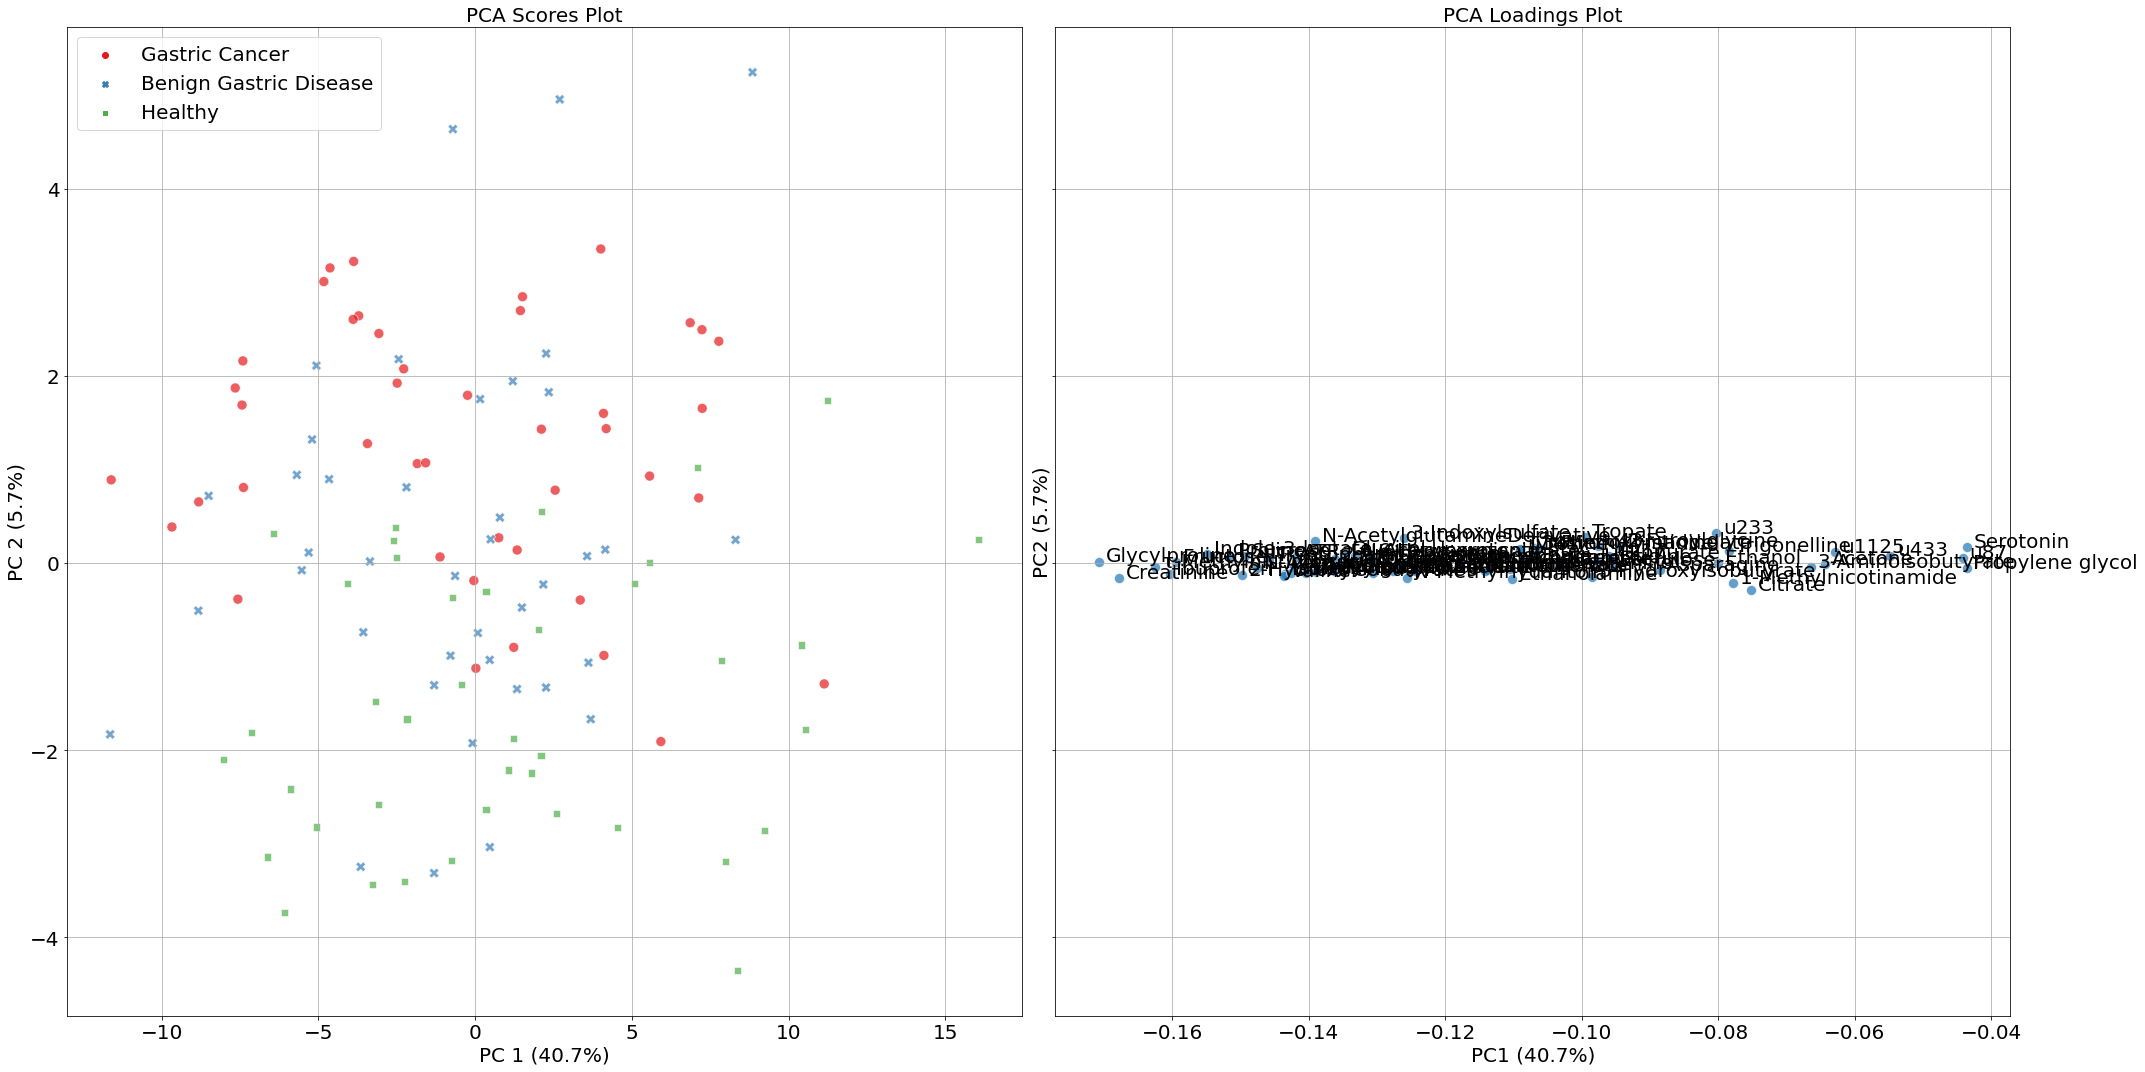

In [17]:
multivis.pca(Xscale
             , imageFileName='PCA_gastric_cancer.png'
             , saveImage=True
             , dpi=300
             , pcx=1
             , pcy=2
             , group_label=DataTableClean.Class
             , sample_label=None
             , peak_label=PeakTableClean.Label
             , markerSize=100
             , fontSize=20
             , figSize=(30,15)
             , background_colour='white'
             , grid=True
             , transparent=False
             , cmap='Set1')

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 8. Plot PCA components as lollipop plot with bootstrapped confidence intervals

Plots the PCA components with bootstrapped confidence intervals, providing an indication of which features drive the majority of the observed variance and to what significance.

</div>

/Users/brettchapman/multivis/multivis/pcaLoadings.py:42: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  PCA_CIs = bootstrap.ci(data=data, statfunction=bootpca, n_samples=bootnum, alpha=alpha)


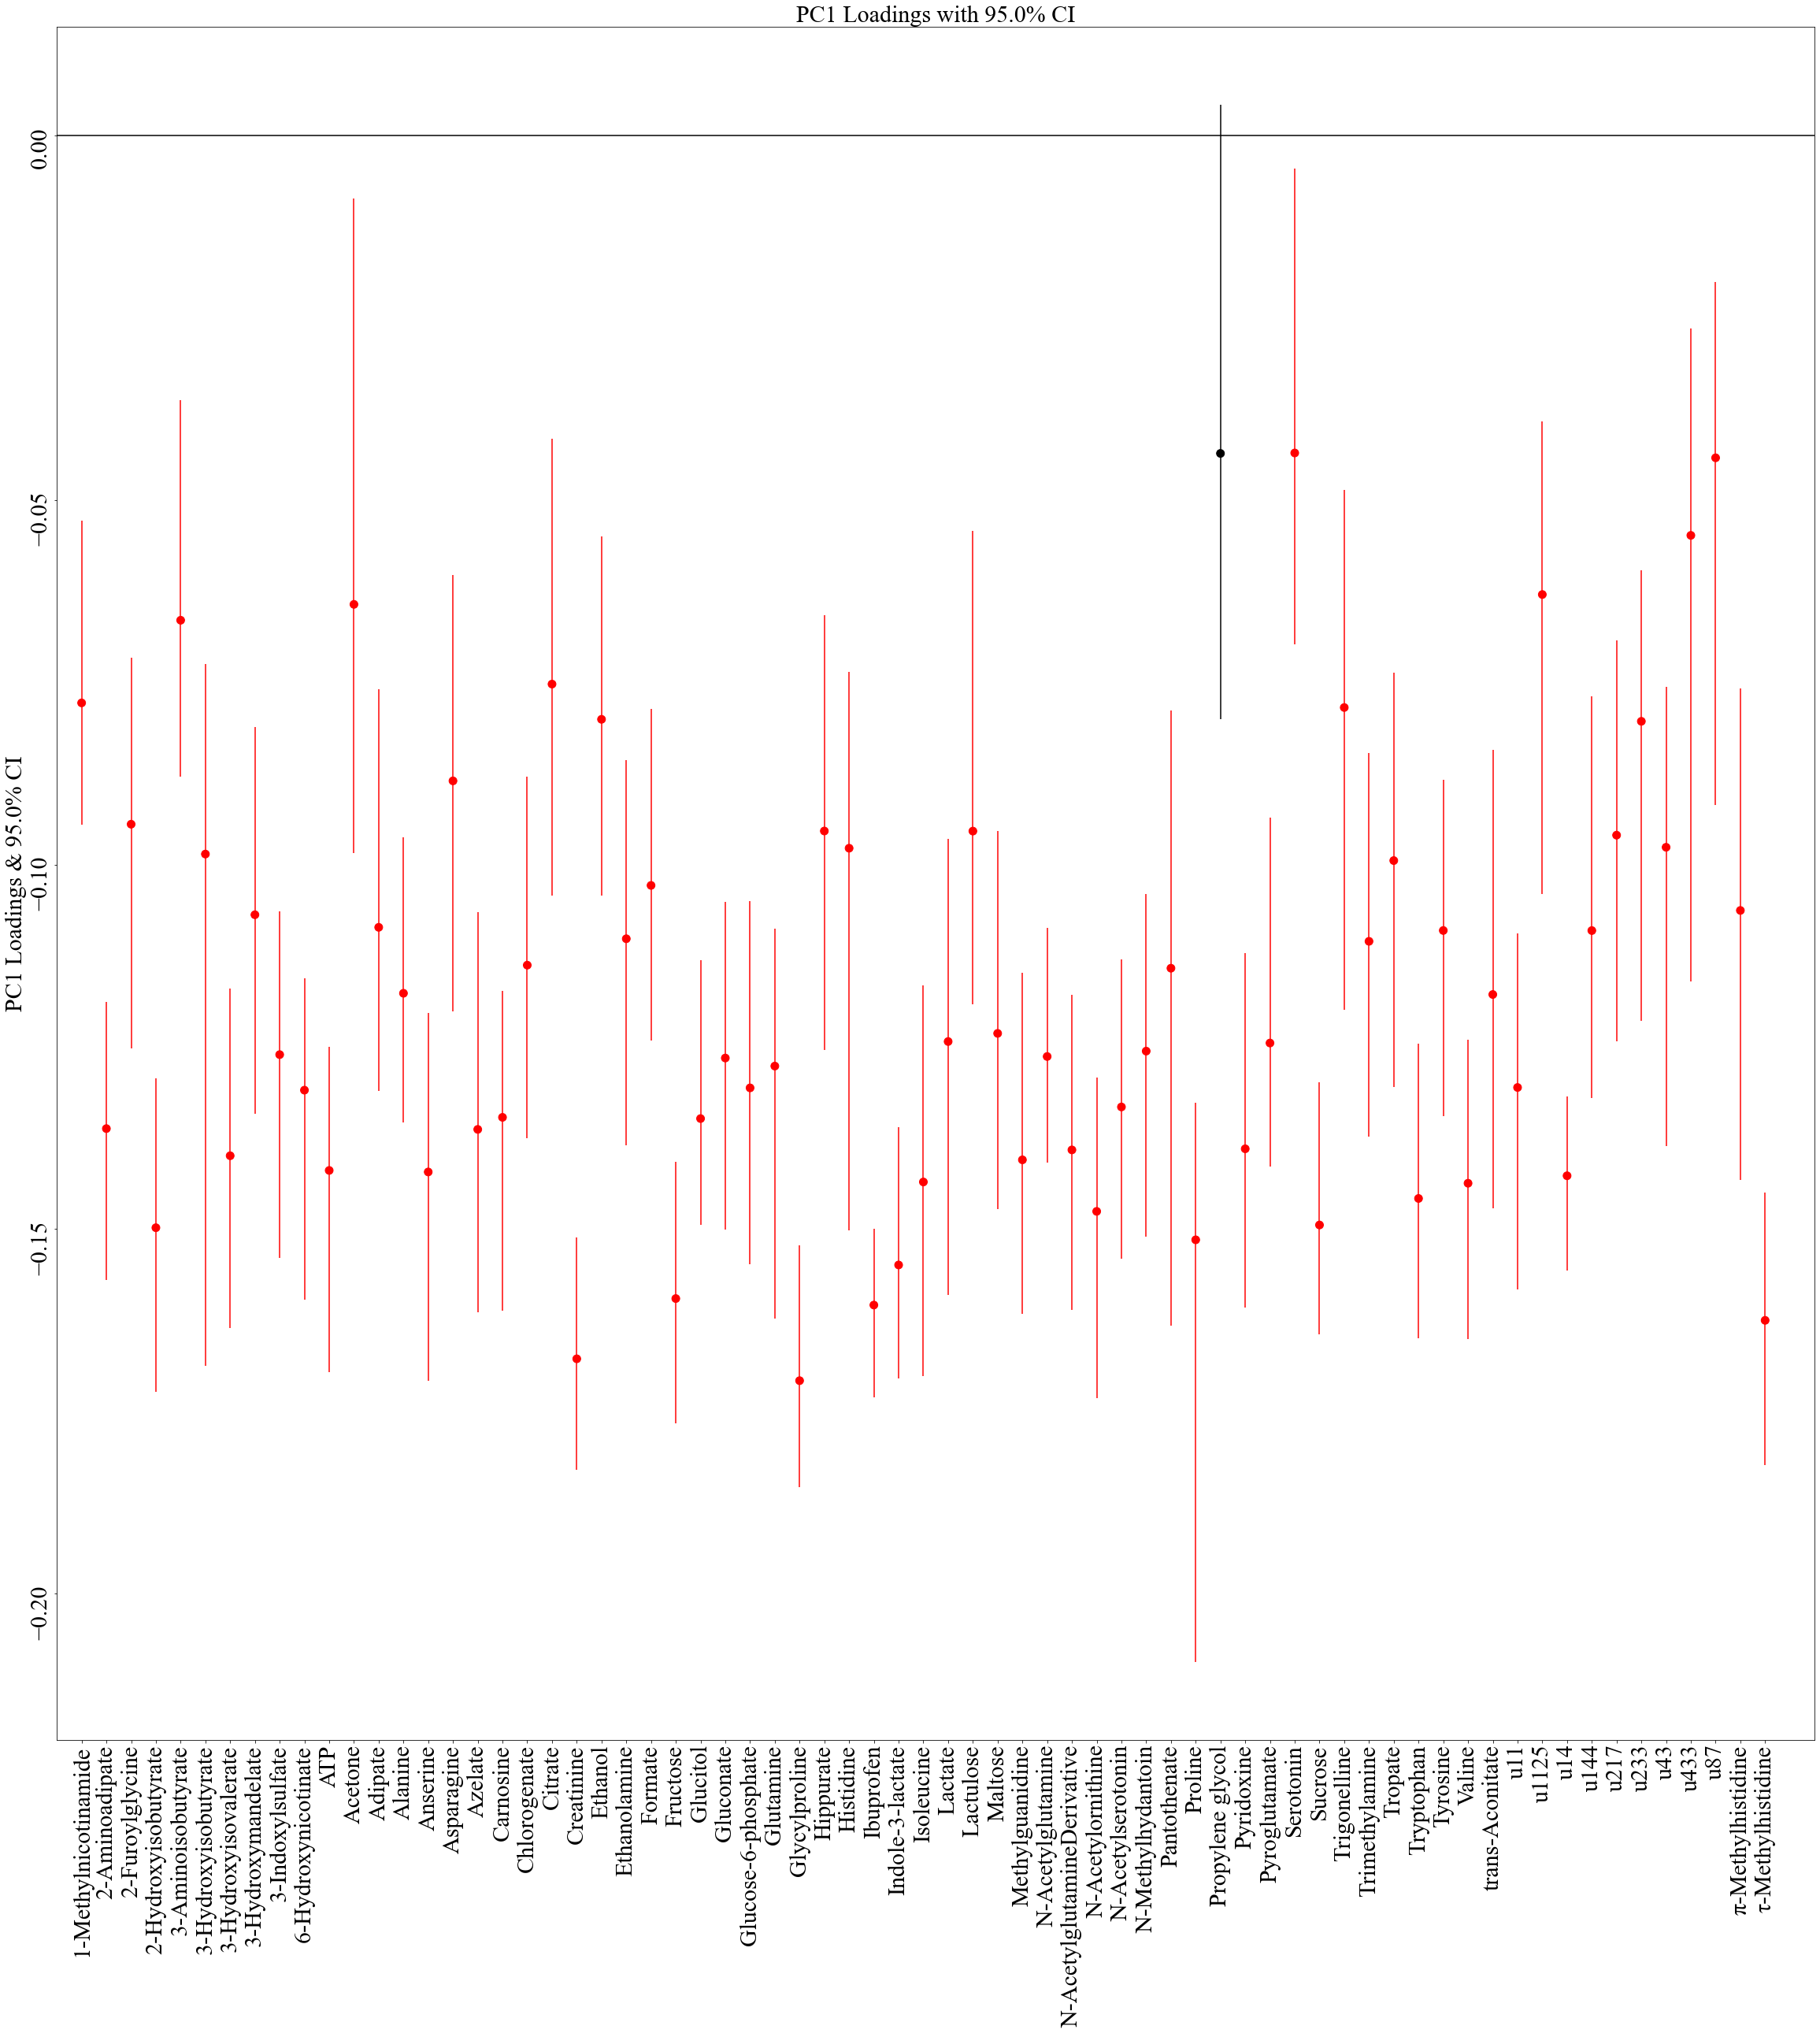

In [18]:
multivis.pcaLoadings(Xscale
                     , PeakTableClean.Label
                     , 'PC1_loadings_lollipop_gastric_cancer.png'
                     , saveImage=True
                     , dpi=300
                     , pc_num=1
                     , bootnum=100
                     , alpha=0.05
                     , fontSize=30
                     , markerSize=100
                     , figSize=(40,40)
                     , transparent=False)

/Users/brettchapman/multivis/multivis/pcaLoadings.py:42: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  PCA_CIs = bootstrap.ci(data=data, statfunction=bootpca, n_samples=bootnum, alpha=alpha)


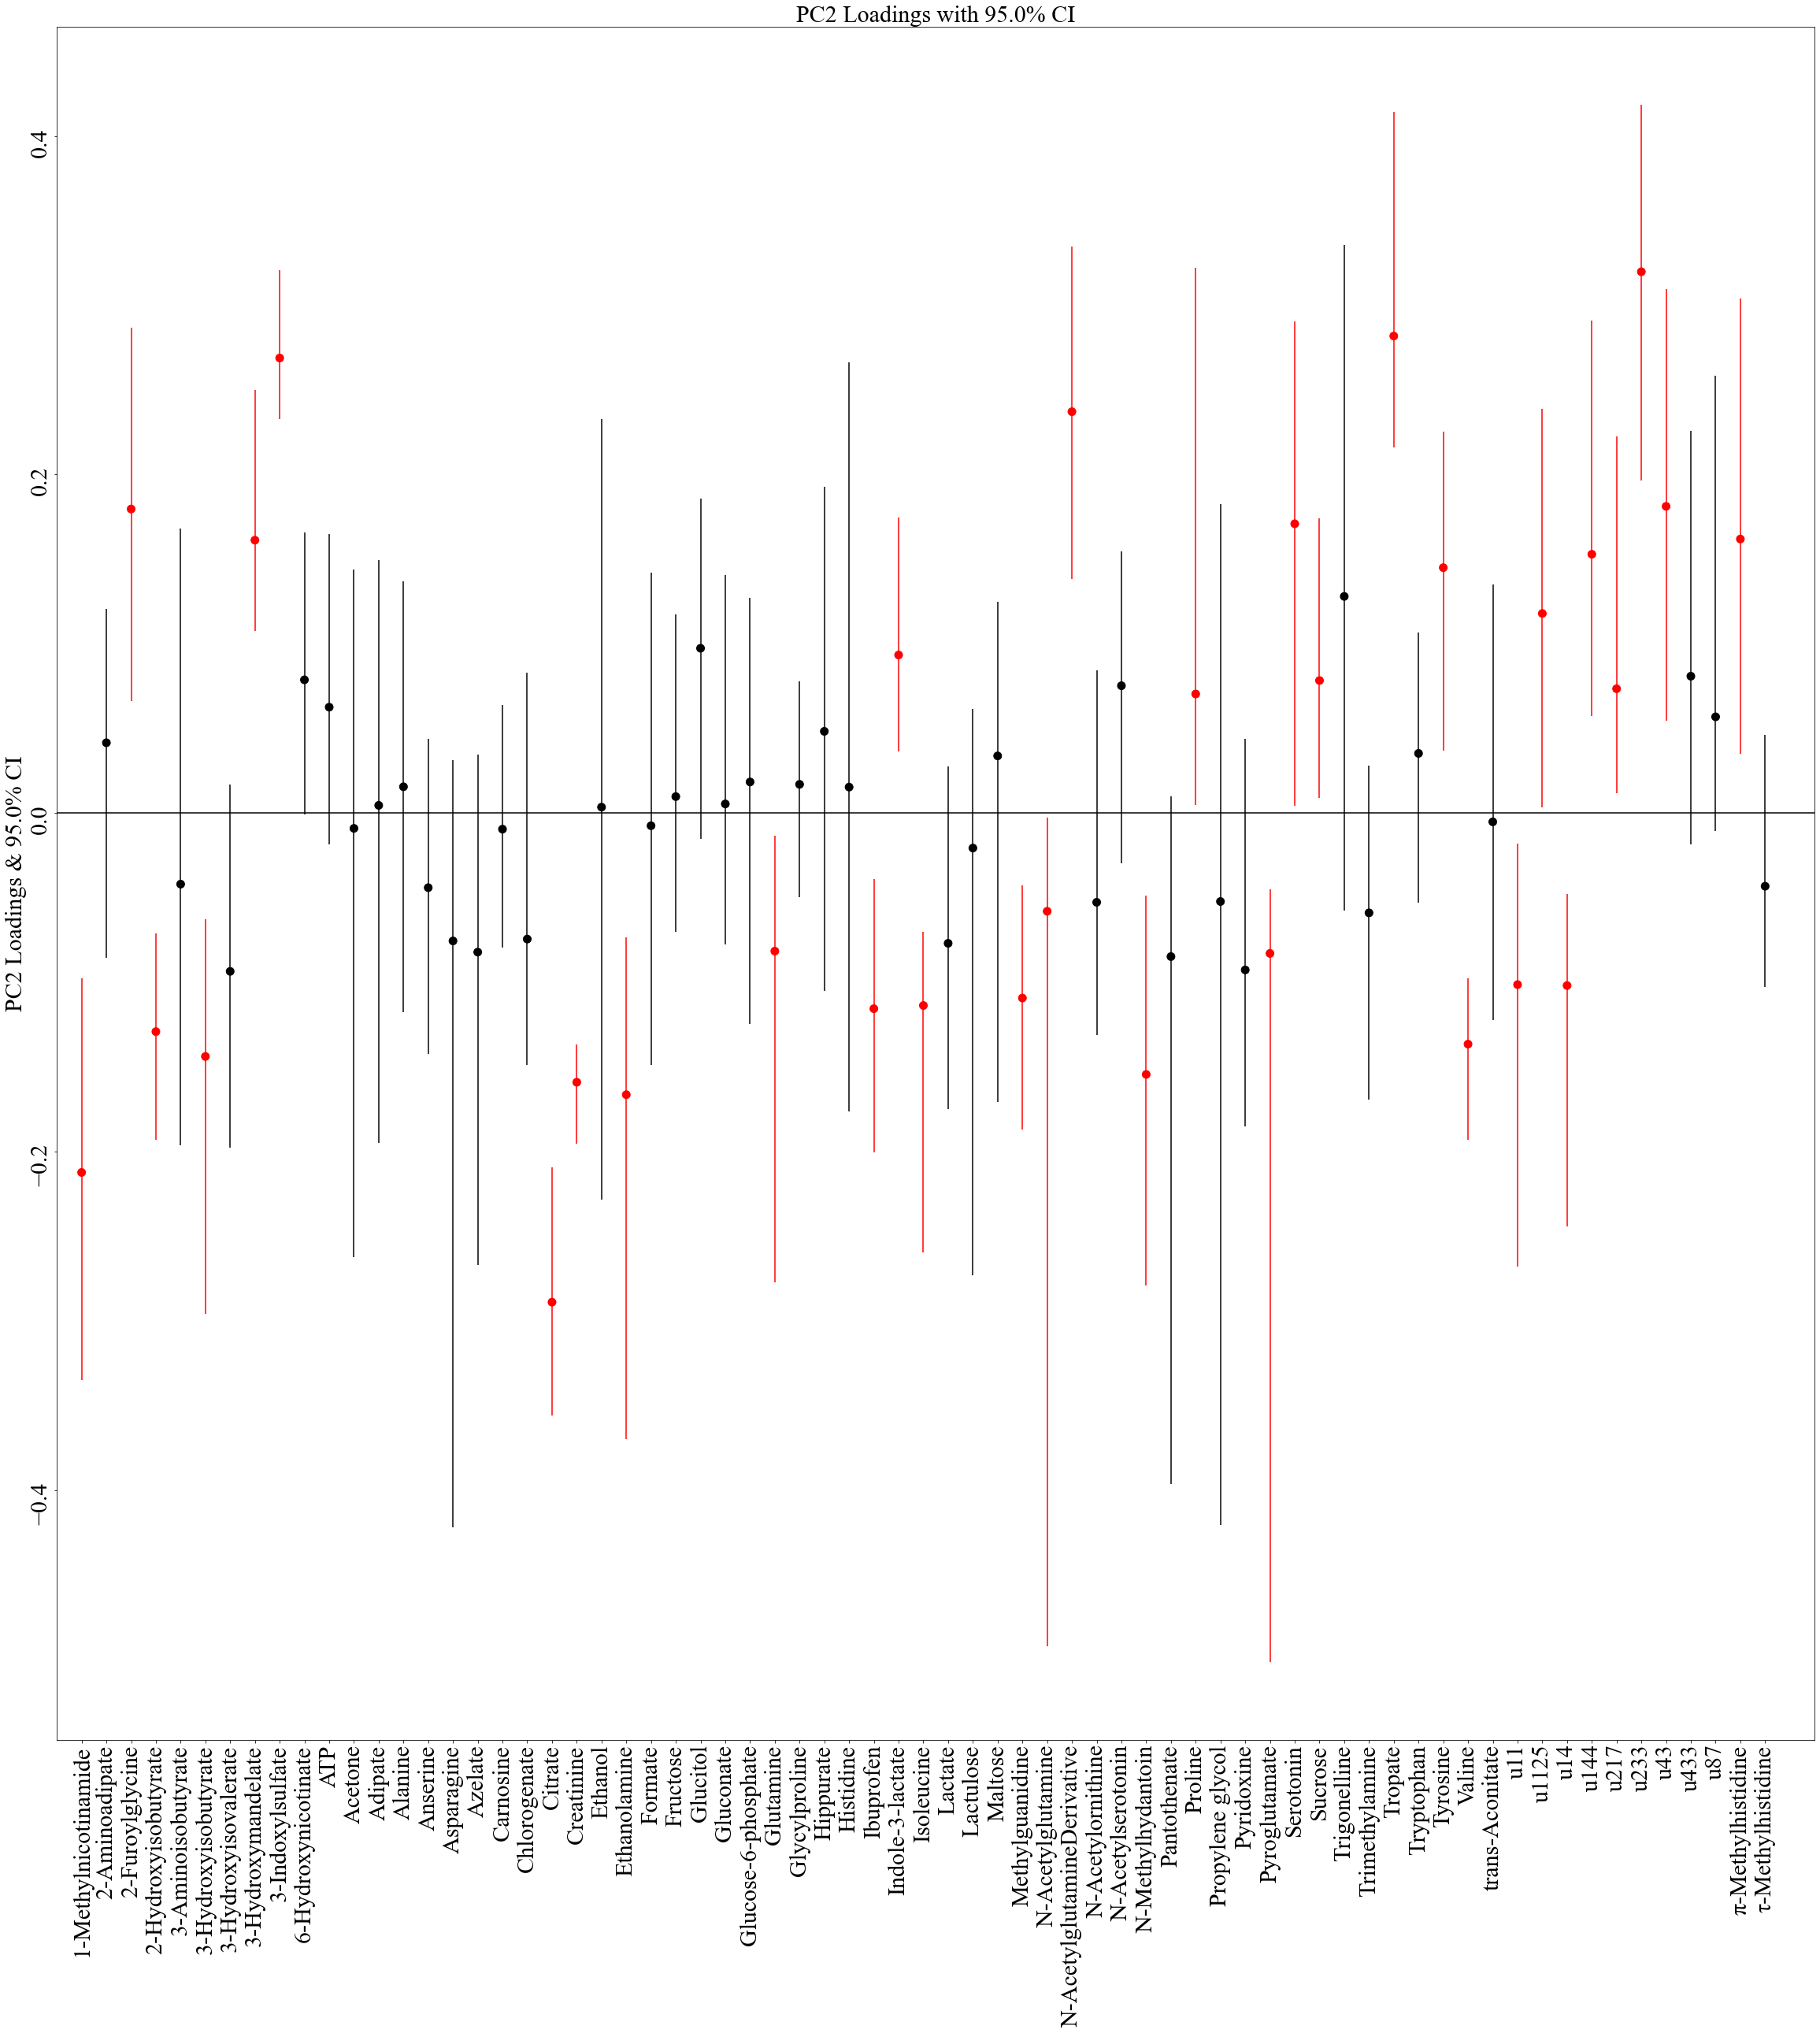

In [19]:
multivis.pcaLoadings(Xscale
                     , PeakTableClean.Label
                     , 'PC2_loadings_lollipop_gastric_cancer.png'
                     , saveImage=True
                     , dpi=300
                     , pc_num=2
                     , bootnum=100
                     , alpha=0.05
                     , fontSize=30
                     , markerSize=100
                     , figSize=(40,40)
                     , transparent=False)